1 - Reading and preparing the data


In [1]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Reading the data
df = pd.read_csv("UScomments.csv", on_bad_lines = 'skip', low_memory=False)

In [3]:
#First 5 rows of data
df.head()

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0


In [4]:
#Last 5 rows of data
df.tail()

,video_id,comment_text,likes,replies
691395,EoejGgUNmVU,Лучшая,1,0
691396,EoejGgUNmVU,qu'est ce que j'aimerais que tu viennes à Roan...,0,0
691397,EoejGgUNmVU,Ven a mexico! 😍 te amo LP,0,0
691398,EoejGgUNmVU,Islığı yeter...,0,0
691399,EoejGgUNmVU,Kocham tą piosenkę😍❤❤❤byłam zakochana po uszy ...,0,0


In [5]:
#Checking if there are missing values
df.isnull().sum()

video_id         0
comment_text    26
likes            0
replies          0
dtype: int64

In [6]:
#Dropping the lines that are null
df.dropna(inplace=True)

In [7]:
#No null lines now
df.isnull().sum()

video_id        0
comment_text    0
likes           0
replies         0
dtype: int64

2 - Perform Emoji's Analysis

In [8]:
import emoji

In [9]:
df["comment_text"].head(6)

0                    Logan Paul it's yo big day ‼️‼️‼️
1    I've been following you from the start of your...
2                   Say hi to Kong and maverick for me
3                                  MY FAN . attendance
4                                           trending 😉
5                              #1 on trending AYYEEEEE
Name: comment_text, dtype: object

In [10]:
#Extract the emojis from the data
emojis = []

for comment in df["comment_text"].dropna():
    for char in comment:
        if char in emoji.EMOJI_DATA:
            emojis.append(char)

In [11]:
len(emojis)

294549

In [12]:
from collections import Counter
#Most common emojis 
Counter(emojis).most_common(10)

[('😂', 36987),
 ('😍', 33453),
 ('❤', 31119),
 ('🔥', 8694),
 ('😭', 8398),
 ('👏', 5719),
 ('😘', 5545),
 ('👍', 5476),
 ('💖', 5359),
 ('💕', 5147)]

In [13]:
#Finding frequencies of most common 10 emojis
emoji = [Counter(emojis).most_common(10)[i][0] for i in range(10)]
freqs = [Counter(emojis).most_common(10)[i][1] for i in range(10)]

In [19]:
#Plotting data
import plotly.graph_objs as go
import plotly.io as pio

In [20]:
trace = go.Bar(x=emoji, y=freqs)
fig = go.Figure(data=[trace])
fig

<Axes: xlabel='Emoji', ylabel='Frequency'>

C:\Users\omerf\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:93: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\omerf\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:93: UserWarning: Glyph 128079 (\N{CLAPPING HANDS SIGN}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\omerf\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:93: UserWarning: Glyph 128077 (\N{THUMBS UP SIGN}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\omerf\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:93: UserWarning: Glyph 128150 (\N{SPARKLING HEART}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\omerf\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:93: UserWarning: Glyph 128149 (\N{TWO HEARTS}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\omerf\AppData\Roaming\Python\

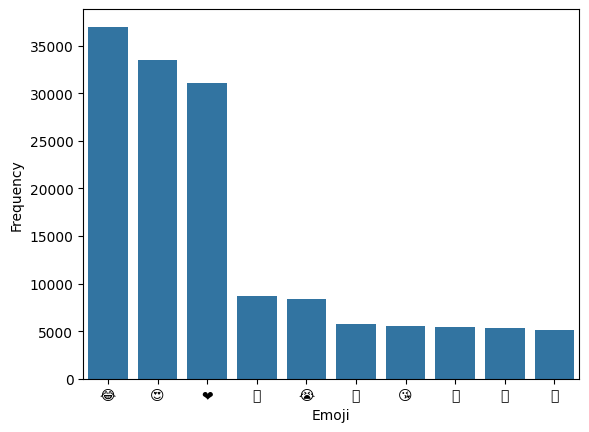

In [18]:
#Plotting the emojis (This is just for github because static charts cant be seen)
data = pd.DataFrame({"Emoji" : emoji, "Frequency" : freqs})

sns.barplot(x="Emoji", y="Frequency", data=data)